In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
haber=pd.read_csv("haberman.csv")

In [38]:
haber

,Age,Operation_Year,Axil_Nodes_Detected,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [4]:
haber.shape

(306, 4)

In [5]:
haber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  306 non-null    int64
 1   Operation_Year       306 non-null    int64
 2   Axil_Nodes_Detected  306 non-null    int64
 3   Survival_Status      306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [6]:
haber.describe()

,Age,Operation_Year,Axil_Nodes_Detected,Survival_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [7]:
haber["Survival_Status"].value_counts()

1    225
2     81
Name: Survival_Status, dtype: int64

## Univariate Data Analysis

### 1-D Scatter plot

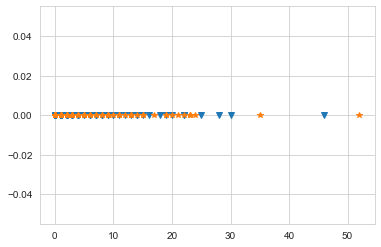

In [71]:
haber_long_survive=haber.loc[haber["Survival_Status"]==1]
haber_short_survive=haber.loc[haber["Survival_Status"]==2]
plt.plot(haber_long_survive["Axil_Nodes_Detected"],np.zeros_like(haber_long_survive["Axil_Nodes_Detected"]),'v')
plt.plot(haber_short_survive["Axil_Nodes_Detected"],np.zeros_like(haber_short_survive["Axil_Nodes_Detected"]),'*')

### Histograms

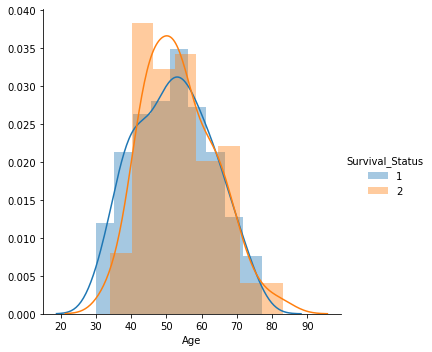

In [10]:
sns.FacetGrid(haber,hue="Survival_Status",height=5).map(sns.distplot,"Age").add_legend()

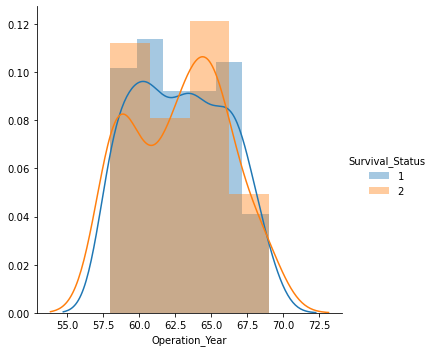

In [11]:
sns.FacetGrid(haber,hue="Survival_Status",height=5).map(sns.distplot,"Operation_Year").add_legend()

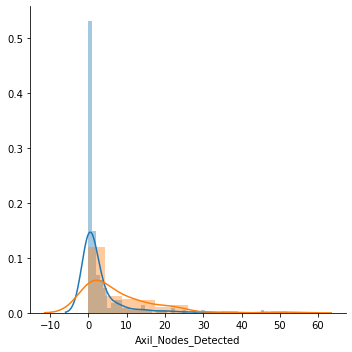

In [12]:
sns.FacetGrid(haber,hue="Survival_Status",height=5).map(sns.distplot,"Axil_Nodes_Detected")

By seeing these Histograms we can clearly say that Axil_Nodes_Detected is better than Age and Operation_Year.

### CDF

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


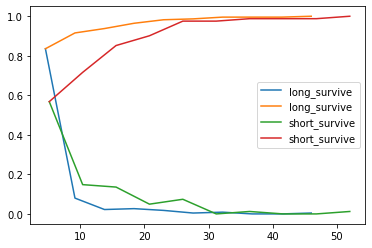

In [50]:
counts,bin_edges=np.histogram(haber_long_survive["Axil_Nodes_Detected"],bins=10)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="long_survive")
plt.plot(bin_edges[1:],cdf,label="long_survive")
plt.legend()

counts,bin_edges=np.histogram(haber_short_survive["Axil_Nodes_Detected"],bins=10)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="short_survive")
plt.plot(bin_edges[1:],cdf,label="short_survive")
plt.legend()

### box plot

<AxesSubplot:xlabel='Survival_Status', ylabel='Axil_Nodes_Detected'>

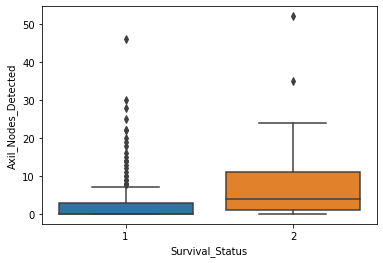

In [51]:
sns.boxplot(x="Survival_Status",y="Axil_Nodes_Detected",data=haber)

### violin plot

<AxesSubplot:xlabel='Survival_Status', ylabel='Axil_Nodes_Detected'>

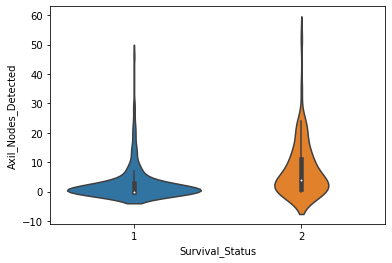

In [52]:
sns.violinplot(x="Survival_Status",y="Axil_Nodes_Detected",data=haber)

## Bivariate Analysis

## Scatter plots

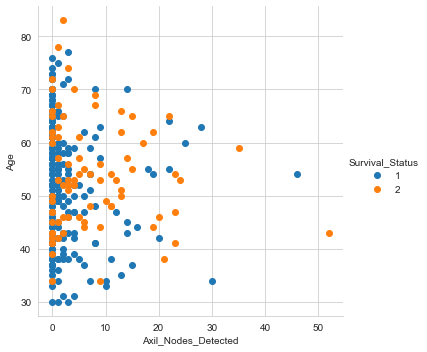

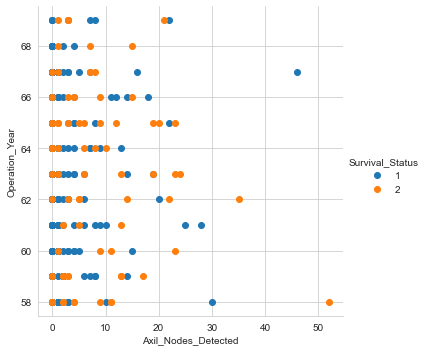

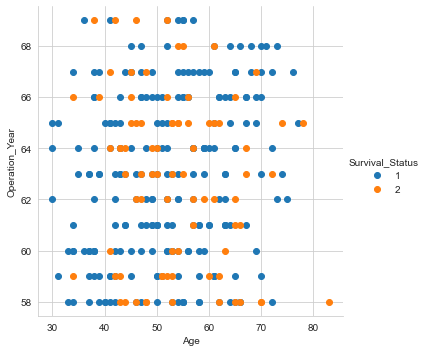

In [60]:
sns.set_style("whitegrid")
sns.FacetGrid(haber,hue="Survival_Status",height=5).map(plt.scatter,"Axil_Nodes_Detected","Age").add_legend()
sns.FacetGrid(haber,hue="Survival_Status",height=5).map(plt.scatter,"Axil_Nodes_Detected","Operation_Year").add_legend()
sns.FacetGrid(haber,hue="Survival_Status",height=5).map(plt.scatter,"Age","Operation_Year").add_legend()


### Pair plots

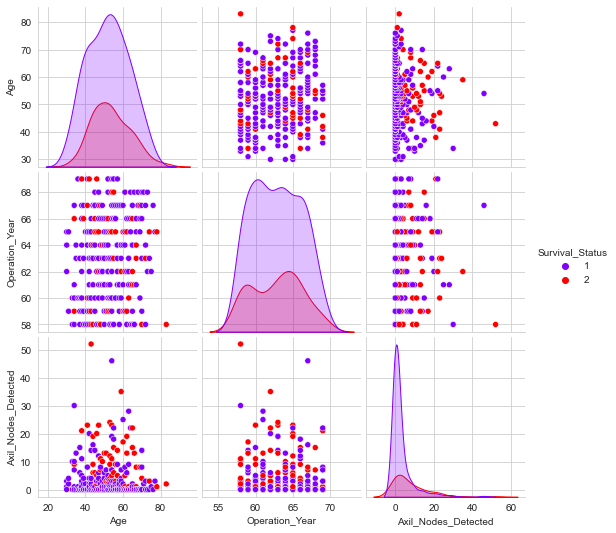

In [72]:
sns.pairplot(haber,hue="Survival_Status",palette="rainbow")